# Experiment records
- Dataset used: entire existing dataset 
- Accuracy: 99.9%
- Description of experiment: To check the performance and analyse the misclassifications of old model (resnet_trained_model_digit_with_printed_v1_new_finetune_13_08_22_epoch_5.h5 

In [1]:
import tensorflow as tf
import sys  
import os
sys.path.append(os.path.realpath('../../src'))
# from predict import pred_using_h5_digit, pred_using_tflite_model
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

2023-01-03 14:14:05.268051: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-03 14:14:05.268074: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
model = tf.keras.models.load_model('../../models/pre-trained_model/resnet_trained_model_digit_with_printed_v1_new_finetune_13_08_22_epoch_5.h5')

2023-01-03 14:14:08.714370: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-03 14:14:08.714397: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ti-lap-492): /proc/driver/nvidia/version does not exist
2023-01-03 14:14:08.714736: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def pred_using_h5_digit(model, path, gt = None, prediction= None, wrong_results = None):
    result = {}
    wrong_results = {}
    gt=[]
    prediction = []
    wrong_count=0
    for img1 in sorted(glob.iglob(path)):
        img=cv2.imread(img1)
        img=cv2.resize(img,(28,28))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.astype('float32') / 255.
        img= np.reshape(img,(1,28,28,1))
        res=model.predict(img)
        pred=res[0].argmax(axis=0)
        ground_truth = int(img1.split('/')[-2])
        gt.append(int(ground_truth))
        prediction.append(pred)
        result[img1] = pred
        if pred!= int(ground_truth):
            wrong_count+=1
            wrong_results[img1] = pred
    accuracy = (len(glob.glob(path))-wrong_count)/len(glob.glob(path))
    return result, accuracy, gt, prediction, wrong_results

In [5]:
path = os.path.expanduser('~')+'/Downloads/printed_digits_v1/0/*'
print(len(glob.glob(path)))
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

4072


2023-01-03 14:15:00.316677: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [5]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4072

    accuracy                           1.00      4072
   macro avg       1.00      1.00      1.00      4072
weighted avg       1.00      1.00      1.00      4072



In [6]:
path = os.path.expanduser('~')+'/Downloads/printed_digits_v1/1/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [7]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9991411394217006
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3493
          10       0.00      0.00      0.00         0

    accuracy                           1.00      3493
   macro avg       0.50      0.50      0.50      3493
weighted avg       1.00      1.00      1.00      3493



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
len(wrong_results)

3

Text(0.5, 0.98, 'Misclassifications')

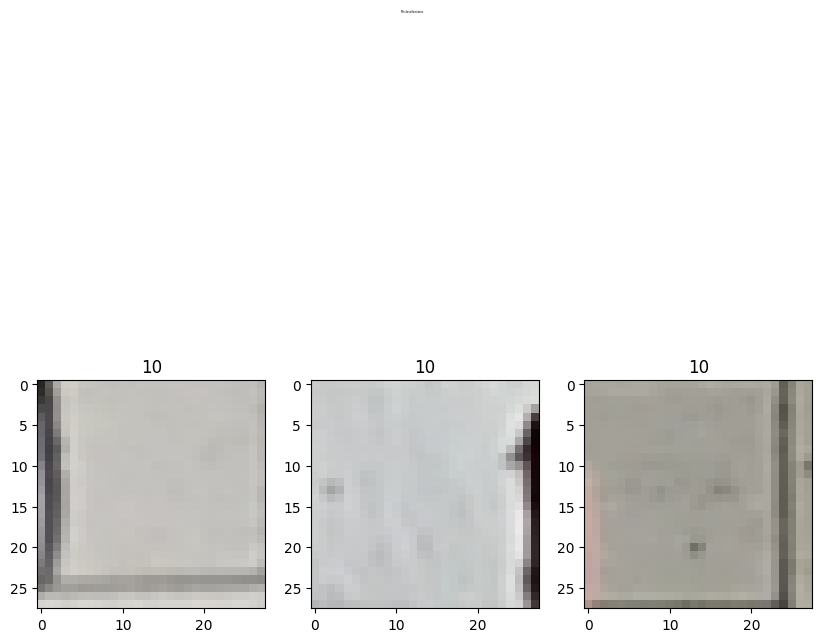

In [9]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=3, figsize=(10,10))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items()):
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

In [10]:
path = os.path.expanduser('~')+'/Downloads/printed_digits_v1/2/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [11]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           2       1.00      1.00      1.00      3448

    accuracy                           1.00      3448
   macro avg       1.00      1.00      1.00      3448
weighted avg       1.00      1.00      1.00      3448



In [12]:
path = os.path.expanduser('~')+'/Downloads/printed_digits_v1/3/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [13]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00      5080

    accuracy                           1.00      5080
   macro avg       1.00      1.00      1.00      5080
weighted avg       1.00      1.00      1.00      5080



In [14]:
path = os.path.expanduser('~')+'/Downloads/printed_digits_v1/4/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [15]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           4       1.00      1.00      1.00      3468

    accuracy                           1.00      3468
   macro avg       1.00      1.00      1.00      3468
weighted avg       1.00      1.00      1.00      3468



In [16]:
path = os.path.expanduser('~')+'/Downloads/printed_digits_v1/5/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [17]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9996265870052278
              precision    recall  f1-score   support

           5       1.00      1.00      1.00      2678
           6       0.00      0.00      0.00         0

    accuracy                           1.00      2678
   macro avg       0.50      0.50      0.50      2678
weighted avg       1.00      1.00      1.00      2678



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
len(wrong_results)

1

Text(0.5, 0.98, 'Misclassifications')

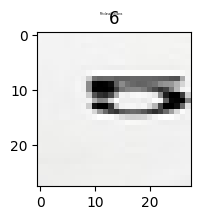

In [20]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=1, figsize=(2,2))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items()):
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

In [21]:
path = os.path.expanduser('~')+'/Downloads/printed_digits_v1/6/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [22]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9996630727762803
              precision    recall  f1-score   support

           6       1.00      1.00      1.00      2968
           8       0.00      0.00      0.00         0

    accuracy                           1.00      2968
   macro avg       0.50      0.50      0.50      2968
weighted avg       1.00      1.00      1.00      2968



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
len(wrong_results)

1

Text(0.5, 0.98, 'Misclassifications')

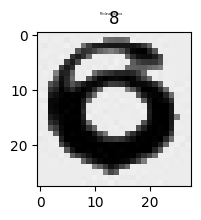

In [24]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=1, figsize=(2,2))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items()):
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

In [25]:
path = os.path.expanduser('~')+'/Downloads/printed_digits_v1/7/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [26]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           7       1.00      1.00      1.00      3446

    accuracy                           1.00      3446
   macro avg       1.00      1.00      1.00      3446
weighted avg       1.00      1.00      1.00      3446



In [27]:
path = os.path.expanduser('~')+'/Downloads/printed_digits_v1/8/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [28]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           8       1.00      1.00      1.00      3404

    accuracy                           1.00      3404
   macro avg       1.00      1.00      1.00      3404
weighted avg       1.00      1.00      1.00      3404



In [29]:
path = os.path.expanduser('~')+'/Downloads/printed_digits_v1/9/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [30]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9994308480364257
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         0
           9       1.00      1.00      1.00      1757

    accuracy                           1.00      1757
   macro avg       0.50      0.50      0.50      1757
weighted avg       1.00      1.00      1.00      1757



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
len(wrong_results)

1

Text(0.5, 0.98, 'Misclassifications')

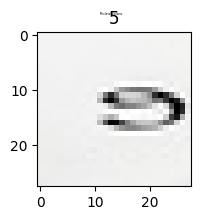

In [32]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=1, figsize=(2,2))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items()):
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)